<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_3/rising_C02_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import urllib.request
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
data_url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
data_file = '../../data_external/CO2_levels'


In [68]:
import shutil
if not os.path.isdir('../../data_external/'):
  os.mkdir('../../data_external/')
A= urllib.request.urlopen(data_url)
B = open(data_file, 'wb')
shutil.copyfileobj(A, B)
B.close()


In [67]:
data = np.genfromtxt(data_file, skip_header=72)

# Mask invalid values using numpy's masked array
data = np.ma.masked_invalid(data)

# Define column names
columns = ['year', 'month', 'date', 'average']

# Create a pandas DataFrame from the masked data
df = pd.DataFrame(data)

# Display the resulting DataFrame
df

0    1          2       3       4     5     6     7
0    1959.0  5.0  1959.3699  318.29  315.49  -1.0 -9.99 -0.99
1    1959.0  6.0  1959.4548  318.15  316.03  -1.0 -9.99 -0.99
2    1959.0  7.0  1959.5370  316.54  315.86  -1.0 -9.99 -0.99
3    1959.0  8.0  1959.6219  314.80  316.06  -1.0 -9.99 -0.99
4    1959.0  9.0  1959.7068  313.84  316.73  -1.0 -9.99 -0.99
..      ...  ...        ...     ...     ...   ...   ...   ...
766  2023.0  3.0  2023.2083  420.98  419.53  30.0  0.74  0.26
767  2023.0  4.0  2023.2917  423.36  420.69  28.0  0.60  0.22
768  2023.0  5.0  2023.3750  424.00  420.55  31.0  0.69  0.24
769  2023.0  6.0  2023.4583  423.68  421.18  29.0  0.54  0.19
770  2023.0  7.0  2023.5417  422.14  421.76  31.0  0.57  0.20

[771 rows x 8 columns]

In [28]:
# Group data by year and month, then calculate the mean of the averages
monthly_averages = data['average']


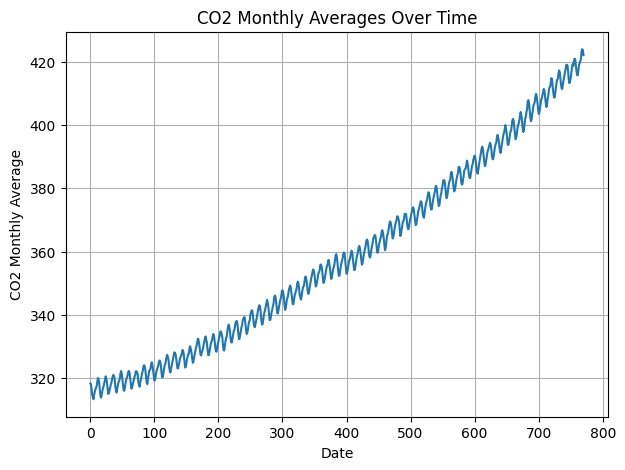

In [29]:
plt.figure(figsize=(7, 5))
plt.plot(monthly_averages)
plt.xlabel('Date')
plt.ylabel('CO2 Monthly Average')
plt.title('CO2 Monthly Averages Over Time')
plt.grid(True)  # Add grid lines
plt.show()

In [46]:
# Calculate the first differences
rate_change = np.diff(monthly_averages)




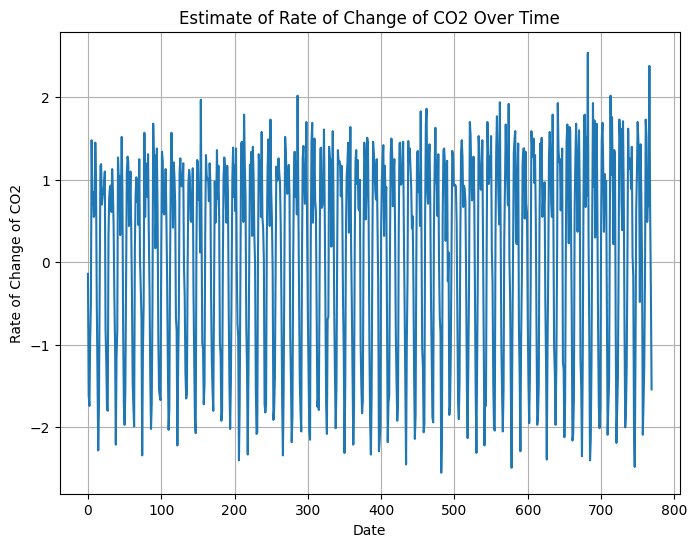

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(rate_change)
plt.xlabel('Date')
plt.ylabel('Rate of Change of CO2')
plt.title('Estimate of Rate of Change of CO2 Over Time')
plt.grid(True)  # Add grid lines
plt.show()
